# A translation of the ISCC-NBS Color Naming System into CIELAB Lch

The [ISCC–NBS System of Color Designation](https://en.wikipedia.org/wiki/ISCC%E2%80%93NBS_system) is a system for naming colors based on a set of 12 basic color terms and a small set of adjective modifiers. This system formally defines a set of non-technical color names as a subset of the [Munsell System](https://en.wikipedia.org/wiki/Munsell_color_system), which was an early attempt at measuring color in terms of a hue, value, and chroma.

Unfortunately, converting Munsell to a more present-day conventional system (such as RGB or Lab) [involves interpolation of empirical data in 3D that is highly non-linear](https://stackoverflow.com/a/12556404) and libraries for handling Munsell seem to be few and far between. Which is unfortunate, since the ISCC-NBS naming system seems like a useful categorization scheme.

The Python [Colour Science](https://www.colour-science.org/) library does provide such conversion functionality, and we can use that to renotate and re-bound the color ranges from the ISCC-NBS system.

In [1]:
# But first, we need some things...
import sys
!{sys.executable} -m pip install -q matplotlib colour-science ipympl shapely
%load_ext autoreload
%autoreload 2

In [2]:
# Pull in data for the ISCC-NBS system
from colordb import ColorDatabase
import os

colordb = ColorDatabase(os.path.join(os.getcwd(), "..", "iscc-nbs.xml"))

print(colordb.get_descriptor_from_munsell('6P 4.5/11.0').name)

Strong purple


The Munsell color volume can be thought of as a cylinder (or at least cylinder-like). Most of the charts in _The Universal Color Language_ are given as x-y range plots, looking at slices of that cylinder, but we can also present the information in polar form.

/home/bstreiff/jupyter/.venv/lib/python3.9/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: "RGB" array contains values over 1 and will be normalised, unpredictable results may occur!
  warn(*args, **kwargs)


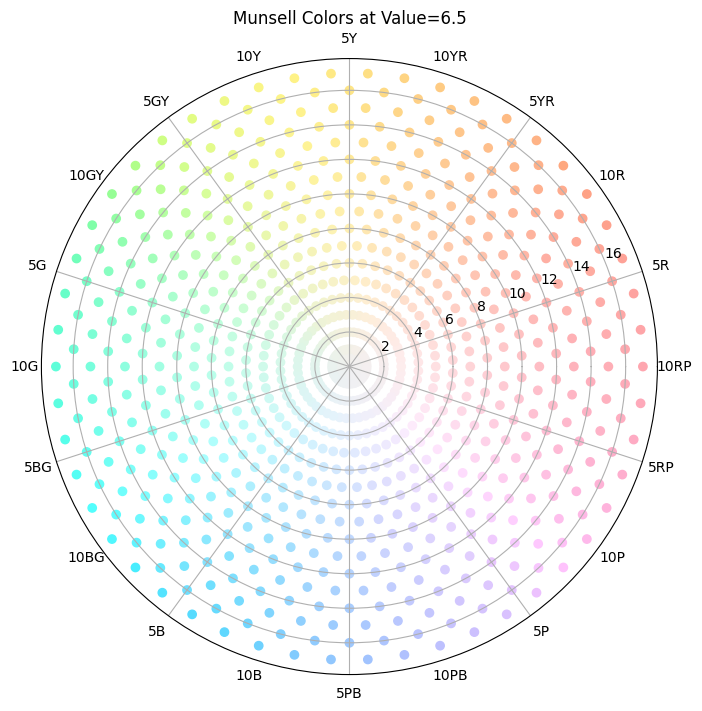

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import colour
import itertools

from ISCC_NBS_renotations import munsell_to_polar
from ISCC_NBS_renotations import munsell_to_rgbstr
from ISCC_NBS_renotations import set_xticks_munsell_hues

from munsell import munsell_specification_to_munsell_colour

hues = np.arange(1, 10, 2.0)
hues_offset = np.arange(2, 11, 2.0)
hue_codes = range(1, 11)
chromas = [0.25, 0.50, 1.0] + [x for x in np.arange(2, 18, 2.0)]
chromas_offset = np.arange(3, 18, 2.0)
value = 9.5
colors_to_plot = (
    [munsell_specification_to_munsell_colour([*x]) for x in itertools.product(hues, [value], chromas, hue_codes)] +
    [munsell_specification_to_munsell_colour([*x]) for x in itertools.product(hues_offset, [value], chromas_offset, hue_codes)]
)

theta, r = zip(*[munsell_to_polar(x) for x in colors_to_plot])
colors = [munsell_to_rgbstr(x) for x in colors_to_plot]

fig = plt.figure(figsize=[8.0, 8.0])
ax = fig.add_subplot(projection='polar')
set_xticks_munsell_hues(ax)
ax.set_title("Munsell Colors at Value=6.5")
c = ax.scatter(theta, r, c=colors)

We can also group these by what 

/home/bstreiff/jupyter/.venv/lib/python3.9/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: "RGB" array contains negative values, those will be clipped, unpredictable results may occur!
  warn(*args, **kwargs)


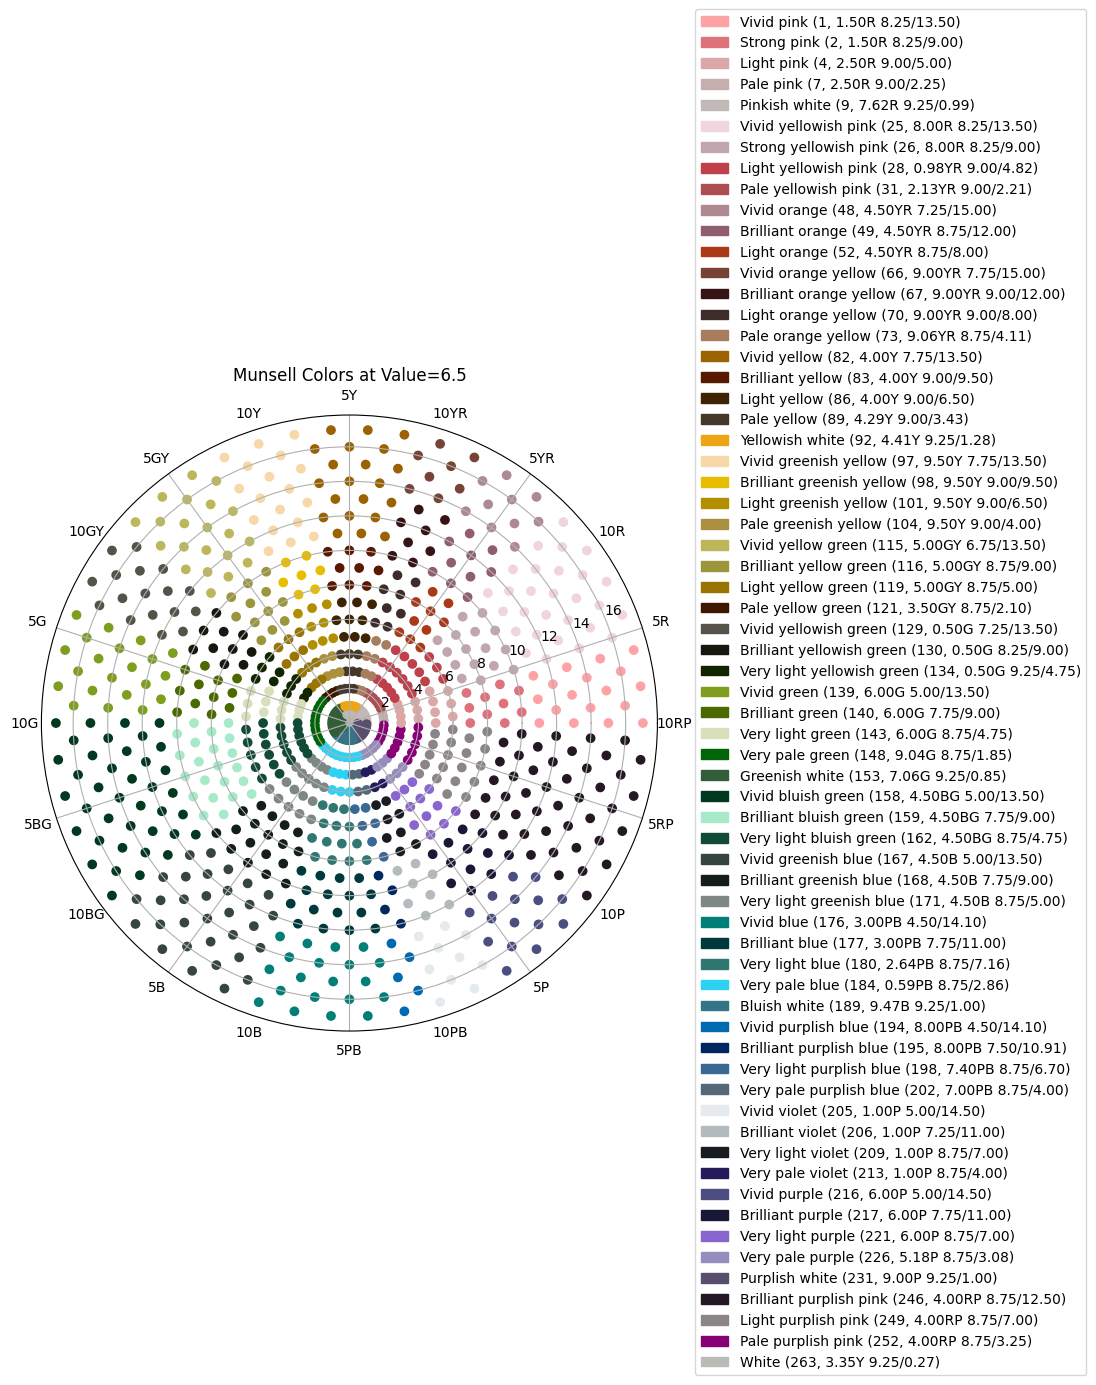

In [4]:
theta, r = zip(*[munsell_to_polar(x) for x in colors_to_plot])

descriptors = [colordb.get_descriptor_from_munsell(x) for x in colors_to_plot]
ids = [x.id for x in descriptors]
unique_ids = list(set(ids))
unique_ids.sort()
color_map = [munsell_to_rgbstr(colordb.get_level3_colors()[id].centroid_color) for id in colordb.get_level3_colors().keys()]
color_labels = ["{} ({}, {})".format(colordb.get_level3_colors()[id].name, id, colordb.get_level3_colors()[id].centroid_color) for id in unique_ids]
color_patches = [mpatches.Patch(color=color_map[unique_ids[i]], label=color_labels[i]) for i in range(0, len(unique_ids))]

color_mapping = [color_map[d.id] for d in descriptors]


fig = plt.figure(figsize=[8.0, 8.0])
ax = fig.add_subplot(projection='polar')
set_xticks_munsell_hues(ax)
ax.set_title("Munsell Colors at Value=6.5")
angle = np.deg2rad(0)
ax.legend(handles=color_patches, loc="center left", bbox_to_anchor=(.55 + np.cos(angle)/2, .55 + np.sin(angle)/2))
c = ax.scatter(theta, r, c=color_mapping)

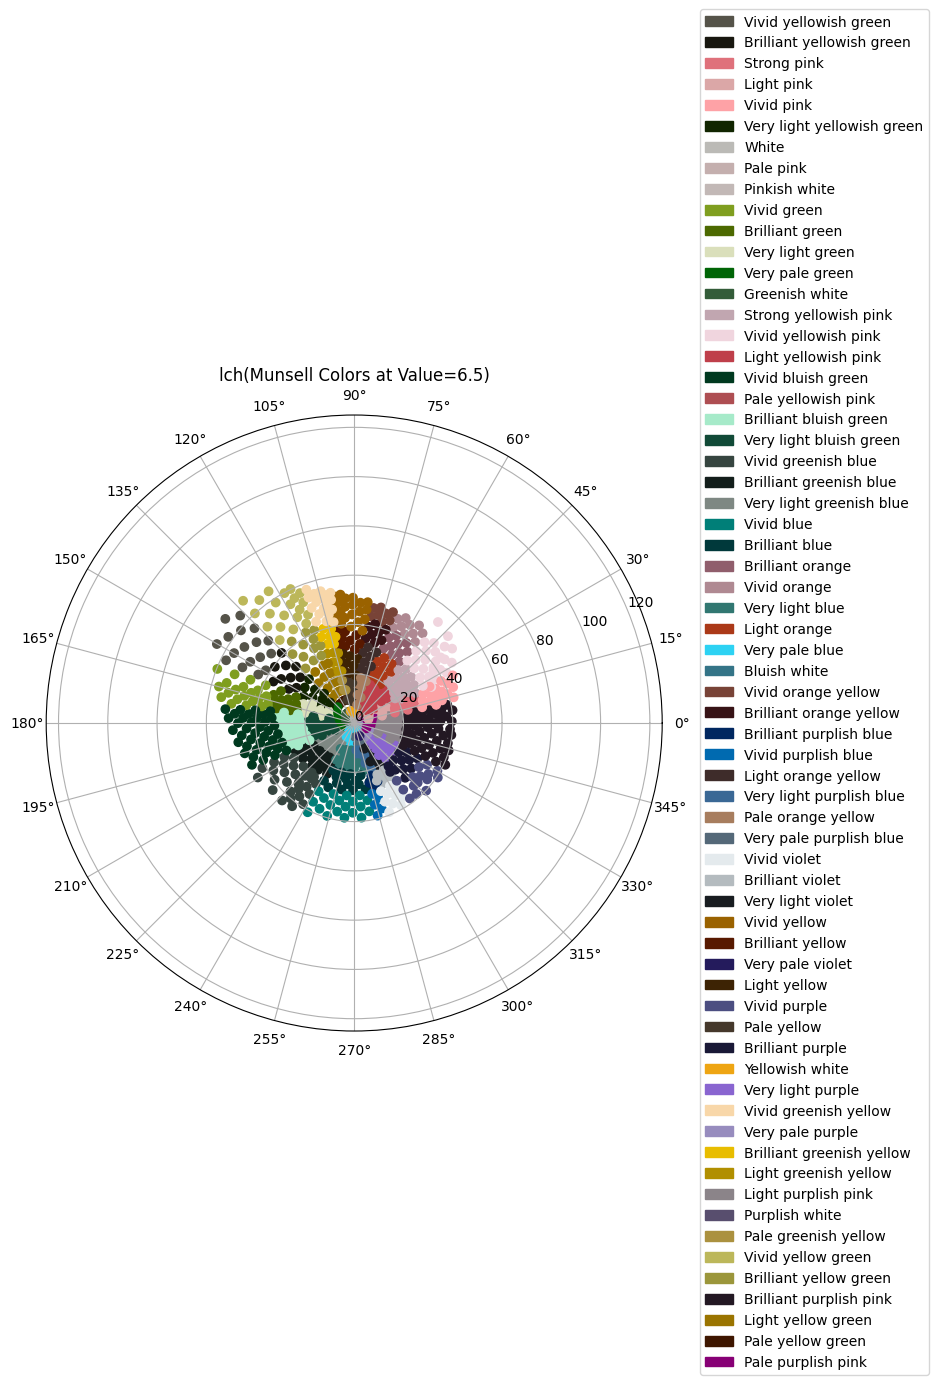

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import colour
import munsell
import itertools

from ISCC_NBS_renotations import munsell_to_lch
from ISCC_NBS_renotations import lch_to_polar

lch_colors_to_plot = [munsell_to_lch(c) for c in colors_to_plot]
theta, r = zip(*[lch_to_polar(x) for x in lch_colors_to_plot])

ids = [colordb.get_descriptor_from_munsell(x).id for x in colors_to_plot]
unique_ids = list(set(ids))
color_map = [munsell_to_rgbstr(colordb.get_level3_colors()[id].centroid_color) for id in colordb.get_level3_colors().keys()]
color_labels = [colordb.get_level3_colors()[id].name for id in unique_ids]
color_patches = [mpatches.Patch(color=color_map[unique_ids[i]], label=color_labels[i]) for i in range(0, len(unique_ids))]

color_mapping = [color_map[id] for id in ids]

fig = plt.figure(figsize=[8.0, 8.0])
ax = fig.add_subplot(projection='polar')
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/ (360.0 / 30.0) ))
#ax.set_xticks(xtick_minor_ticks, labels=xtick_minor_labels, minor=True)
ax.set_yticks(np.arange(0, 140.0, 20.0))
ax.set_title("lch(Munsell Colors at Value=6.5)")
ax.set_ylim(0, 125)
angle = np.deg2rad(0)
ax.legend(handles=color_patches, loc="center left", bbox_to_anchor=(.55 + np.cos(angle)/2, .55 + np.sin(angle)/2))
c = ax.scatter(theta, r, c=color_mapping)

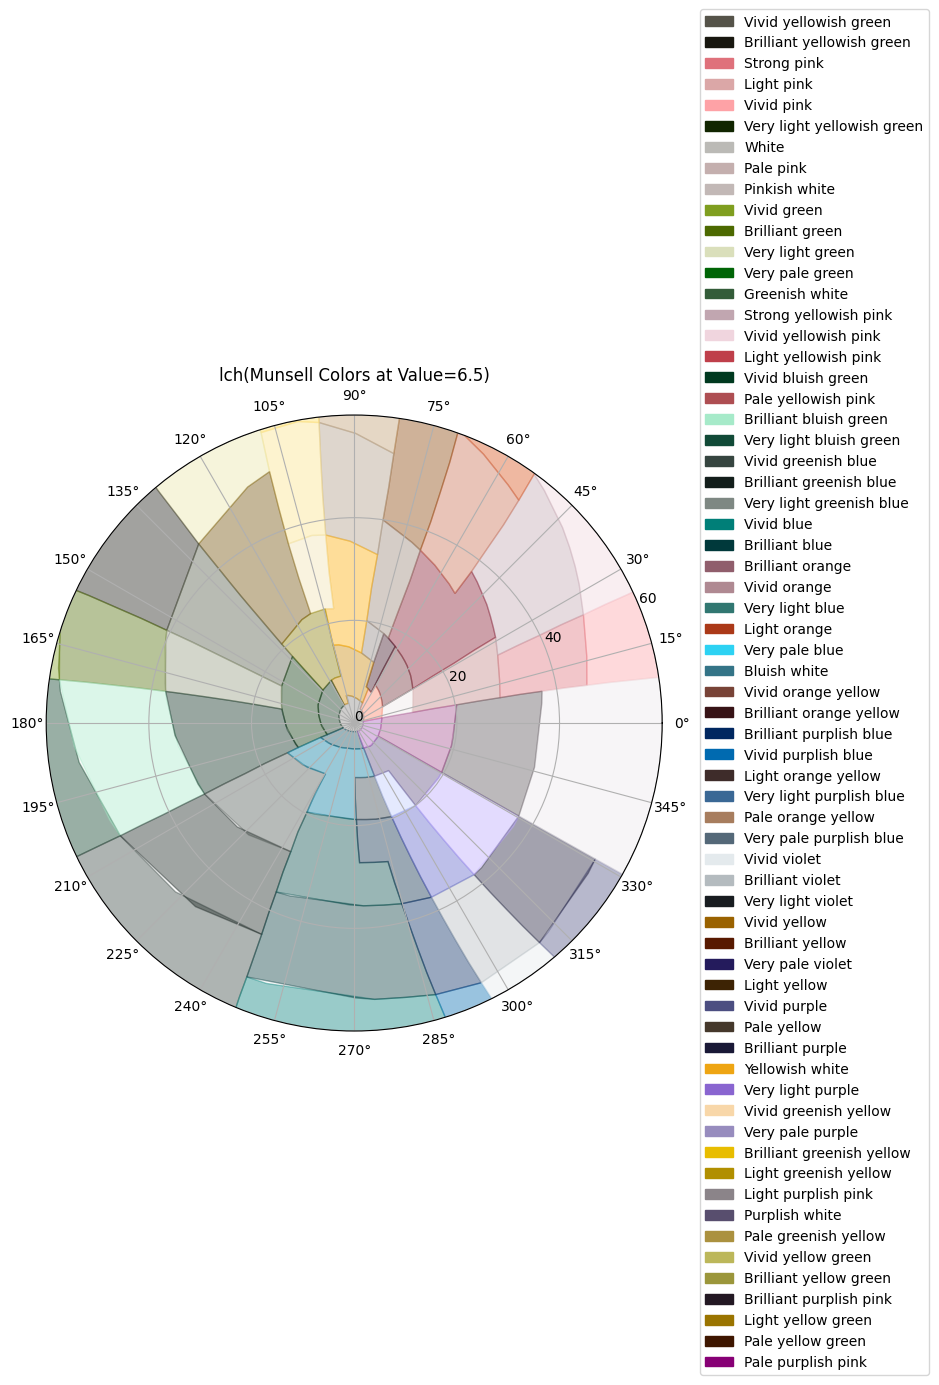

In [7]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from shapely.geometry import Polygon as PolygonShape
from shapely.ops import unary_union

from ISCC_NBS_renotations import lch_to_rgb
from ISCC_NBS_renotations import lch_to_polar
from ISCC_NBS_renotations import munsell_to_lch
from ISCC_NBS_renotations import point_to_hue_and_code

# can we put some blocks behind it?

def block_point_to_vert(hp, v, c):
    hue, hue_code = point_to_hue_and_code(hp)
    is_outside_edge = True if c >= 20.0 else False
    m = munsell_specification_to_munsell_colour([hue, v, c, hue_code])
    lch = munsell_to_lch(m)
    # we want to project this out to "infinity" for purposes of the graph
    if is_outside_edge:
        lch[1] = 2000.0
    return lch_to_polar(lch)

VALUE = 6.5

fig = plt.figure(figsize=[8.0, 8.0])
ax = fig.add_subplot(projection='polar')
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/ (360.0 / 30.0) ))
#ax.set_xticks(xtick_minor_ticks, labels=xtick_minor_labels, minor=True)
ax.set_yticks(np.arange(0, 140.0, 20.0))
ax.set_title("lch(Munsell Colors at Value={})".format(VALUE))
ax.set_ylim(0, 60)
angle = np.deg2rad(0)
ax.legend(handles=color_patches, loc="center left", bbox_to_anchor=(.55 + np.cos(angle)/2, .55 + np.sin(angle)/2))

def get_polygon_vertices(m):
    hue_end = m.hue_end
    if hue_end < m.hue_begin:
        hue_end += 100.0
    chroma_end = m.chroma_end
    if chroma_end > 40.0:
        chroma_end = 40.0

    top    = [(m.hue_begin, x)    for x in np.arange(m.chroma_begin, chroma_end, 1.0)]
    left   = [(x, m.chroma_begin) for x in np.arange(hue_end, m.hue_begin, -5.0)]
    bottom = [(hue_end, x)        for x in np.arange(chroma_end, m.chroma_begin, -1.0)]
    right  = [(x, chroma_end)     for x in np.arange(m.hue_begin, hue_end, 5.0)]

    out = top + right + bottom + left

    return out

def add_background_polygons(plt):
    combined_ranges = {}
    for m in colordb.get_color_ranges():
        if (m.value_begin <= VALUE and VALUE < m.value_end):
            
            hue_end = m.hue_end
            if hue_end < m.hue_begin:
                hue_end += 100.0
            chroma_end = m.chroma_end
            if chroma_end > 20.0:
                chroma_end = 20.0
            new_p = PolygonShape(get_polygon_vertices(m))
            if m.id in combined_ranges:
                union_p = unary_union([combined_ranges[m.id], new_p])
                if union_p.geom_type == 'MultiPolygon':
                    # oops! this one's probably over the 100.0->0.0 crossing
                    x1 = combined_ranges[m.id].exterior.coords[0][0]
                    if x1 < 50.0:
                        new_p = PolygonShape([(c[0] - 100.0, c[1]) for c in new_p.exterior.coords])
                    else:
                        new_p = PolygonShape([(c[0] + 100.0, c[1]) for c in new_p.exterior.coords])
                    union_p = unary_union([combined_ranges[m.id], new_p])
                combined_ranges[m.id] = union_p
            else:
                combined_ranges[m.id] = new_p

    for id in combined_ranges.keys():
        verts = [block_point_to_vert(c[0], VALUE, c[1]) for c in combined_ranges[id].exterior.coords]
        x, y = zip(*verts)
        plt.fill(
            x, y,
            color=color_map[id],
            alpha=0.4
        )

add_background_polygons(plt)
#p = PatchCollection(bg_patches, alpha=0.4)
#p.set_array(bg_patch_colors)
#ax.add_collection(p)
#c = ax.scatter(theta, r, s=2, c=color_mapping)
plt.show()


TypeError: math.exp() takes exactly one argument (2 given)

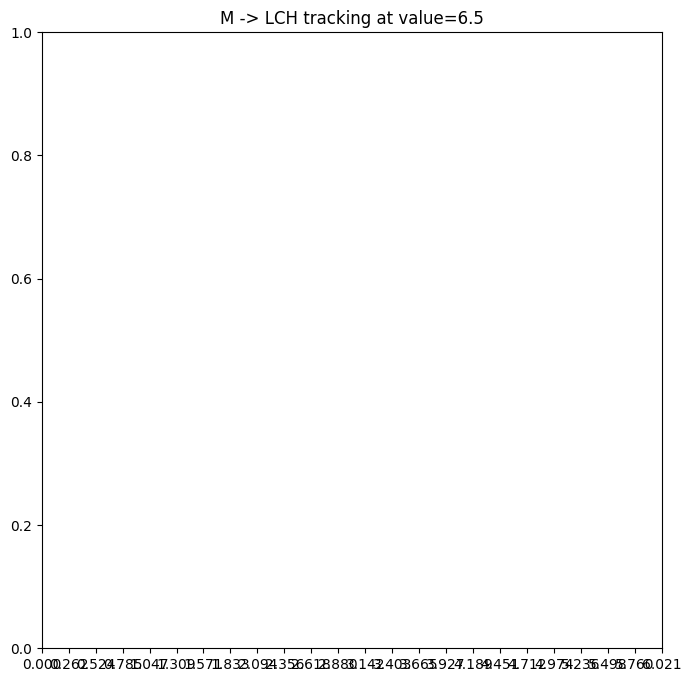

In [77]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np

from ISCC_NBS_renotations import lch_to_rgb
from ISCC_NBS_renotations import lch_to_polar
from ISCC_NBS_renotations import munsell_to_lch
from ISCC_NBS_renotations import point_to_hue_and_code

VALUE = 6.5

fig = plt.figure(figsize=[8.0, 8.0])
ax = fig.add_subplot() #projection='polar')
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/ (360.0 / 30.0) ))
#ax.set_xticks(xtick_minor_ticks, labels=xtick_minor_labels, minor=True)
#ax.set_yticks(np.arange(0, 140.0, 20.0))
ax.set_title("M -> LCH tracking at value={}".format(VALUE))
#ax.set_ylim(-100, 100)

def lch_for_hue_point(hue_point, value, chroma):
    hue, hue_code = point_to_hue_and_code(hue_point)
    munsell_string = munsell_specification_to_munsell_colour([hue, VALUE, chroma, hue_code])
    lch = munsell_to_lch(munsell_string)
    return lch
    
for chroma in np.arange(1.0, 16.0, 1.0):
    xy = [lch_to_polar(lch_for_hue_point(hp, VALUE, chroma)) for hp in np.arange(10.0, 90.0, 2.0)]
    theta, r = zip(*xy)
    r = r - np.mean(r)
    r = r / math.exp(chroma, 2.0)
    theta = theta + (chroma * 0.01)
    ax.plot(theta, r, label='chroma={}'.format(chroma))

def test_plot(hp, value, chroma):
    theta = hp * (np.pi / 50.0)
    #r = math.cos(theta) * chroma + math.sin(theta) + chroma * 5.0
    coeff = [0.5, 0.004]
    r = np.sum([ 2 * x_n * math.cos( ( math.pi * theta * (2 * n + 1) ) / 2 * len(coeff) ) for n, x_n in enumerate(coeff) ])
    r += chroma * 5.0
    return (theta, r)


#xy = [test_plot(hp, VALUE, 10.0) for hp in np.arange(10.0, 90.0, 2.0)]
#theta, r = zip(*xy)
#ax.plot(theta, r, label='estimated at {}'.format(chroma))

    

angle = np.deg2rad(0)
ax.legend(loc="center left", bbox_to_anchor=(.55 + np.cos(angle)/2, .55 + np.sin(angle)/2))

plt.show()